In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
a=pd.read_csv('/content/Financial_Fraud_Detection _Dataset.csv')

# **PREPROCESSING**

Data Cleaning


In [ ]:

a.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
a.tail(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
28292,8,CASH_OUT,7270.37,C457003860,0.0,0.0,C219416103,1523685.68,1530956.05,0.0,0.0
28293,8,CASH_OUT,113043.31,C1845952463,0.0,0.0,C483817115,10085462.79,10014348.15,0.0,0.0
28294,8,CASH_OUT,89346.62,C140193335,0.0,0.0,C1326121635,112673.41,202020.02,0.0,0.0
28295,8,CASH_OUT,138651.85,C297851161,0.0,0.0,C1034382650,142758.39,281410.24,0.0,0.0
28296,8,CASH_OUT,61553.92,C1612091270,0.0,0.0,C8733802,242151.60,30370.00,NaN,NaN


In [ ]:
a.shape

(28297, 11)

In [ ]:
print(a.shape[0])
print(a.shape[1])


28297
11


In [ ]:
a.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
28292,False,False,False,False,False,False,False,False,False,False,False
28293,False,False,False,False,False,False,False,False,False,False,False
28294,False,False,False,False,False,False,False,False,False,False,False
28295,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
a.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
a.dropna(inplace=True)

In [ ]:
a.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28296 entries, 0 to 28295
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28296 non-null  int64  
 1   type            28296 non-null  object 
 2   amount          28296 non-null  float64
 3   nameOrig        28296 non-null  object 
 4   oldbalanceOrg   28296 non-null  float64
 5   newbalanceOrig  28296 non-null  float64
 6   nameDest        28296 non-null  object 
 7   oldbalanceDest  28296 non-null  float64
 8   newbalanceDest  28296 non-null  float64
 9   isFraud         28296 non-null  float64
 10  isFlaggedFraud  28296 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.6+ MB


In [ ]:
a['nameOrig'].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1845952463',
       'C140193335', 'C297851161'], dtype=object)

In [ ]:
a['nameDest'].unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'M301121578',
       'M1505232216', 'C345691183'], dtype=object)

In [ ]:
b=a.values

In [ ]:
b

array([[1, 'PAYMENT', 9839.64, ..., 0.0, 0.0, 0.0],
       [1, 'PAYMENT', 1864.28, ..., 0.0, 0.0, 0.0],
       [1, 'TRANSFER', 181.0, ..., 0.0, 1.0, 0.0],
       ...,
       [8, 'CASH_OUT', 113043.31, ..., 10014348.15, 0.0, 0.0],
       [8, 'CASH_OUT', 89346.62, ..., 202020.02, 0.0, 0.0],
       [8, 'CASH_OUT', 138651.85, ..., 281410.24, 0.0, 0.0]], dtype=object)

In [ ]:
a.value_counts()

step  type      amount      nameOrig     oldbalanceOrg  newbalanceOrig  nameDest     oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
1     CASH_IN   270.78      C619985571   4184966.65     4185237.43      C875917495   3019.00         0.00            0.0      0.0               1
8     CASH_OUT  169512.95   C69643410    188073.98      18561.02        C1624533975  236310.77       394387.32       0.0      0.0               1
                170560.35   C216558151   10416.23       0.00            C1730964371  795628.27       4416336.25      0.0      0.0               1
                170509.34   C146283475   0.00           0.00            C1898859288  803221.23       896323.73       0.0      0.0               1
                170431.05   C949203925   13628.85       0.00            C76005115    22235.00        9082.15         0.0      0.0               1
                                                                                                                                 

In [ ]:
a.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

In [ ]:
a.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,28296.000000,2.829600e+04,2.829600e+04,2.829600e+04,2.829600e+04,2.829600e+04,28296.000000,28296.0
mean,6.508199,1.357431e+05,7.667297e+05,7.823827e+05,8.484026e+05,1.191347e+06,0.002969,0.0
std,2.291113,3.013217e+05,2.126156e+06,2.166648e+06,2.513911e+06,3.106488e+06,0.054405,0.0
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,6.000000,5.966463e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,1.950196e+04,1.964727e+04,3.685915e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,1.601118e+05,1.386889e+05,1.407674e+05,3.655721e+05,6.675980e+05,0.000000,0.0
max,8.000000,1.000000e+07,2.235231e+07,2.246600e+07,2.495524e+07,2.878359e+07,1.000000,0.0


In [ ]:
a.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,28296.0,NaN,NaN,NaN,6.508199,2.291113,1.0,6.0,8.0,8.0,8.0
type,28296,5,PAYMENT,13913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,28296.0,NaN,NaN,NaN,135743.111265,301321.690733,1.77,5966.4625,19501.96,160111.7525,10000000.0
nameOrig,28296,28296,C1231006815,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,28296.0,NaN,NaN,NaN,766729.743656,2126155.998887,0.0,0.0,19647.27,138688.91,22352310.12
newbalanceOrig,28296.0,NaN,NaN,NaN,782382.736079,2166648.397857,0.0,0.0,3685.915,140767.35,22465998.18
nameDest,28296,17076,C985934102,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,28296.0,NaN,NaN,NaN,848402.554639,2513911.248264,0.0,0.0,0.0,365572.14,24955238.07
newbalanceDest,28296.0,NaN,NaN,NaN,1191347.175257,3106487.598267,0.0,0.0,0.0,667597.96,28783585.38
isFraud,28296.0,NaN,NaN,NaN,0.002969,0.054405,0.0,0.0,0.0,0.0,1.0


In [ ]:
a.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
fraud=a[a['isFraud']==1]
normal=a[a['isFraud']==0]

In [ ]:

fraud.shape

(84, 11)

In [ ]:
normal.shape

(28212, 11)

## **NORMALIZATION**

In [ ]:
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
      'oldbalanceDest', 'newbalanceDest']
X = a[numerical_features]

# Normalize each feature
normalized_data = X.copy()
for feature in numerical_features:
    mean = X[feature].mean()
    std = X[feature].std()
    normalized_data[feature] = (X[feature] - mean) / std
print(normalized_data)

           step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     -2.404158 -0.417837      -0.280597       -0.287119       -0.337483   
1     -2.404158 -0.444305      -0.350624       -0.352156       -0.337483   
2     -2.404158 -0.449892      -0.360533       -0.361103       -0.337483   
3     -2.404158 -0.449892      -0.360533       -0.361103       -0.329057   
4     -2.404158 -0.411769      -0.341074       -0.347309       -0.337483   
...         ...       ...            ...             ...             ...   
28291  0.651125 -0.189524      -0.360618       -0.361103        6.535419   
28292  0.651125 -0.426364      -0.360618       -0.361103        0.268619   
28293  0.651125 -0.075334      -0.360618       -0.361103        3.674378   
28294  0.651125 -0.153977      -0.360618       -0.361103       -0.292663   
28295  0.651125  0.009653      -0.360618       -0.361103       -0.280696   

       newbalanceDest  
0           -0.383503  
1           -0.383503  
2           -0.

# **SMOTE**

In [ ]:
x=a.drop(["isFraud"],axis=1)
y=a["isFraud"]

In [ ]:
#SMOTE
x['type'] = x['type'].astype('category').cat.codes
x['nameOrig'] = x['nameOrig'].astype('category').cat.codes
x['nameDest'] = x['nameDest'].astype('category').cat.codes
y=a["isFraud"]
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x,y=smote.fit_resample(x,y)
y.value_counts()

isFraud
0.0    28212
1.0    28212
Name: count, dtype: int64

# **FEATURE EXTRACTION**

In [ ]:
#Correlation
correlation_matrix = normalized_data.corr()
correlation_matrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
step,1.000000,0.072190,-0.041729,-0.042128,-0.000994,0.027308
amount,0.072190,1.000000,0.037237,0.022196,0.320885,0.428225
oldbalanceOrg,-0.041729,0.037237,1.000000,0.997933,0.144480,0.109216
newbalanceOrig,-0.042128,0.022196,0.997933,1.000000,0.148961,0.110357
oldbalanceDest,-0.000994,0.320885,0.144480,0.148961,1.000000,0.918069
newbalanceDest,0.027308,0.428225,0.109216,0.110357,0.918069,1.000000


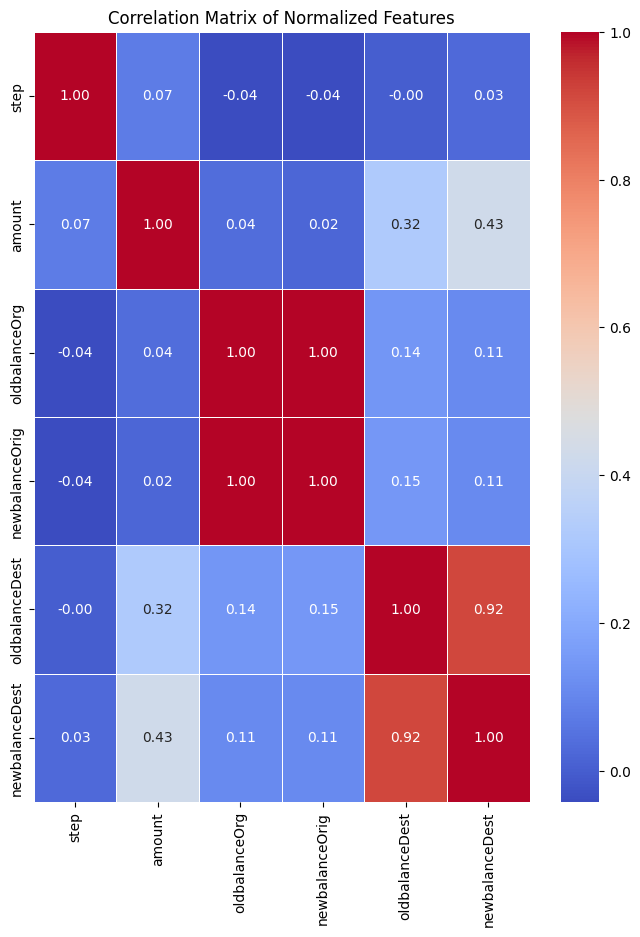

In [ ]:
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Normalized Features')
plt.show()

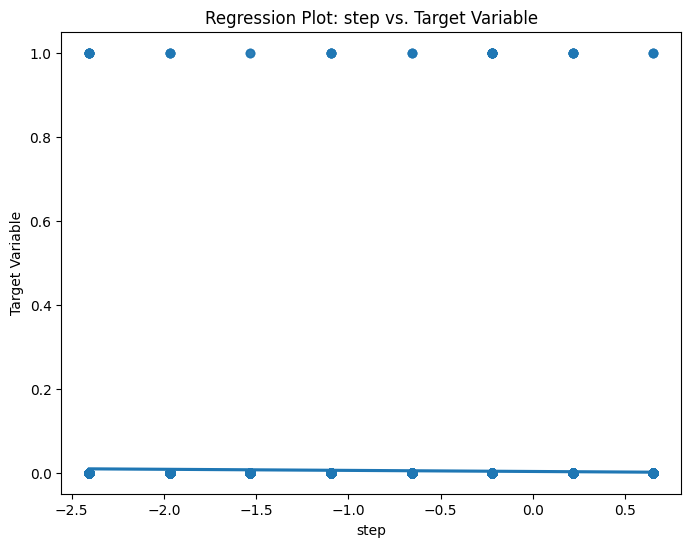

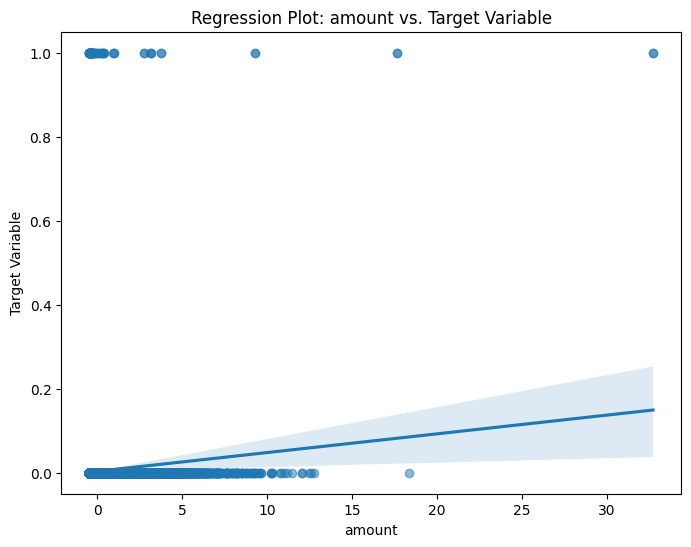

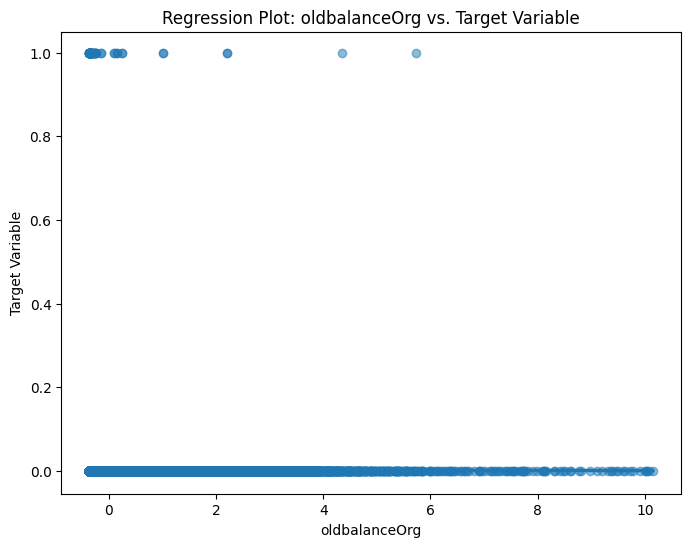

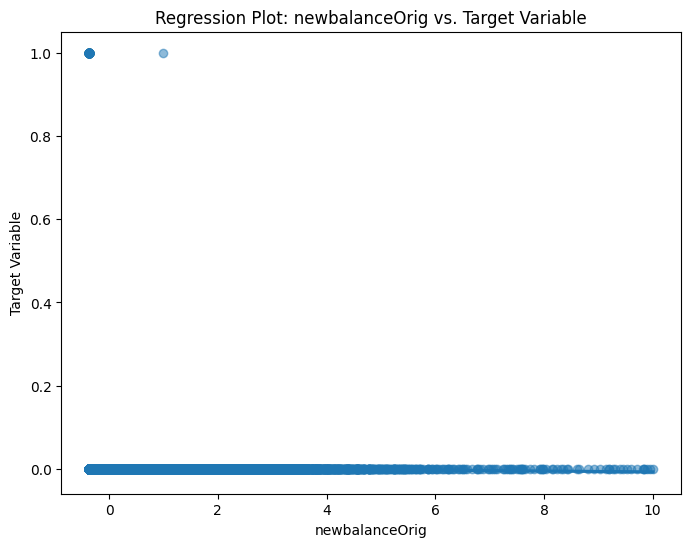

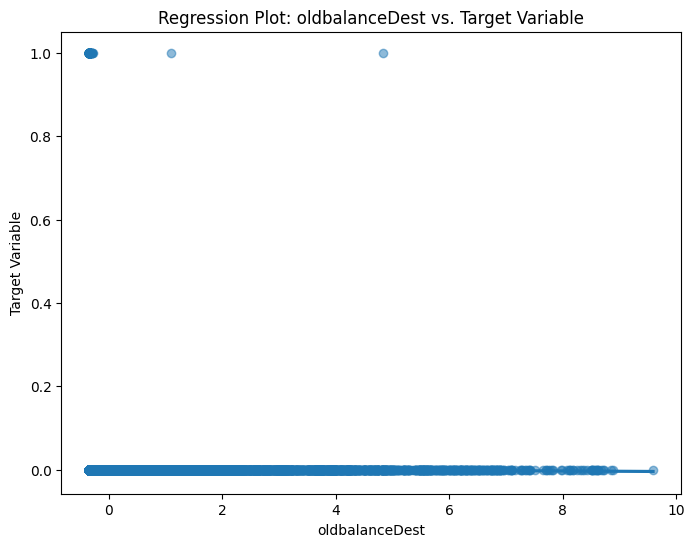

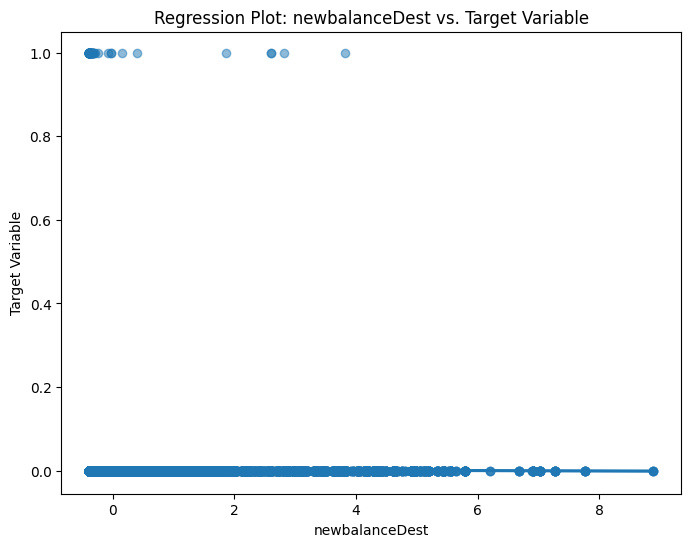

In [ ]:
#Regression
y = a['isFraud']
for feature in normalized_data.columns:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=normalized_data[feature], y=y, scatter_kws={'alpha':0.5})
    plt.title(f"Regression Plot: {feature} vs. Target Variable")
    plt.xlabel(feature)
    plt.ylabel("Target Variable")
    plt.show()

In [ ]:
#row mean,median,mode....
features = pd.DataFrame()
features['mean'] = normalized_data.mean(axis=1)
features['median'] = normalized_data.median(axis=1)
features['mode'] = normalized_data.mode(axis=1)[0]
features['skewness'] = normalized_data.skew(axis=1)
features['kurtosis'] = normalized_data.kurtosis(axis=1)

print(features)



           mean    median      mode  skewness  kurtosis
0     -0.685116 -0.360493 -2.404158 -2.427494  5.915765
1     -0.712038 -0.367829 -2.404158 -2.437820  5.954444
2     -0.716112 -0.372303 -2.404158 -2.437699  5.953983
3     -0.714708 -0.372303 -2.404158 -2.436517  5.949531
4     -0.704216 -0.365406 -2.404158 -2.442915  5.974649
...         ...       ...       ...       ...       ...
28291  1.913162  0.230800 -0.361103  0.987146 -1.429366
28292 -0.019836 -0.125648 -0.426364  0.660369 -1.104012
28293  1.061439  0.287895 -0.361103  0.889229 -1.404218
28294 -0.139284 -0.305567 -0.361103  2.258044  5.196627
28295 -0.105759 -0.286805 -0.361103  1.891806  3.451585

[28296 rows x 5 columns]


In [ ]:
result = pd.concat([normalized_data, features], axis=1)

print(result)

           step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     -2.404158 -0.417837      -0.280597       -0.287119       -0.337483   
1     -2.404158 -0.444305      -0.350624       -0.352156       -0.337483   
2     -2.404158 -0.449892      -0.360533       -0.361103       -0.337483   
3     -2.404158 -0.449892      -0.360533       -0.361103       -0.329057   
4     -2.404158 -0.411769      -0.341074       -0.347309       -0.337483   
...         ...       ...            ...             ...             ...   
28291  0.651125 -0.189524      -0.360618       -0.361103        6.535419   
28292  0.651125 -0.426364      -0.360618       -0.361103        0.268619   
28293  0.651125 -0.075334      -0.360618       -0.361103        3.674378   
28294  0.651125 -0.153977      -0.360618       -0.361103       -0.292663   
28295  0.651125  0.009653      -0.360618       -0.361103       -0.280696   

       newbalanceDest      mean    median      mode  skewness  kurtosis  
0           -

In [ ]:
me = normalized_data.mean()
me

step              3.214217e-17
amount            8.035541e-18
oldbalanceOrg    -4.017771e-18
newbalanceOrig    3.214217e-17
oldbalanceDest    2.059107e-17
newbalanceDest   -1.406220e-17
dtype: float64

In [ ]:
med=normalized_data.median()

In [ ]:
med

step              0.651125
amount           -0.385771
oldbalanceOrg    -0.351377
newbalanceOrig   -0.359402
oldbalanceDest   -0.337483
newbalanceDest   -0.383503
dtype: float64

In [ ]:
std=normalized_data.std()
std

step              1.0
amount            1.0
oldbalanceOrg     1.0
newbalanceOrig    1.0
oldbalanceDest    1.0
newbalanceDest    1.0
dtype: float64

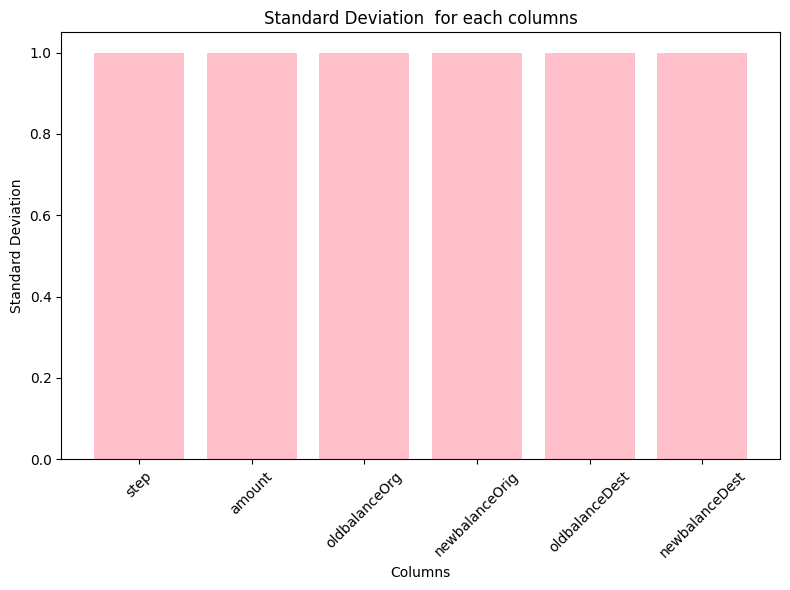

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(std.index, std.values, color='pink')
plt.xlabel('Columns')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation  for each columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
k=normalized_data.kurtosis()
k

step                0.966909
amount            119.096012
oldbalanceOrg      18.749716
newbalanceOrig     18.064397
oldbalanceDest     22.597710
newbalanceDest     16.560782
dtype: float64

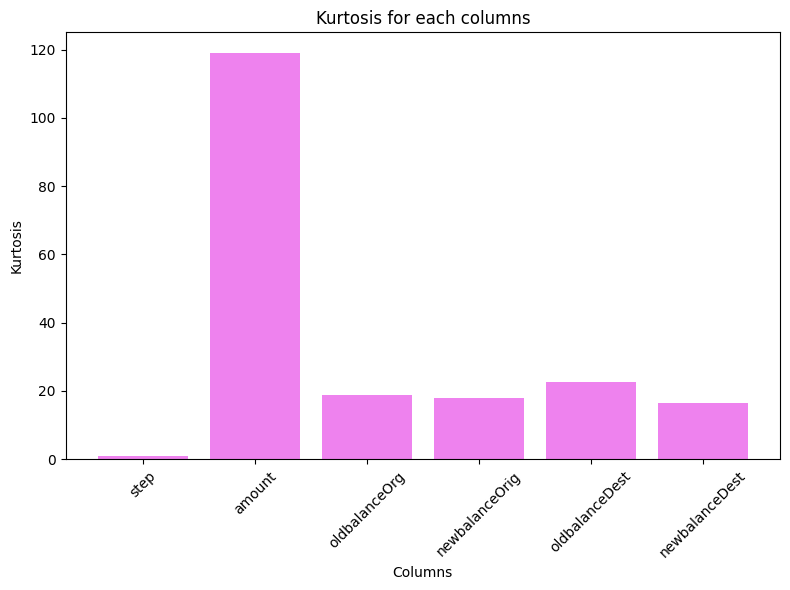

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(k.index, k.values, color='violet')
plt.xlabel('Columns')
plt.ylabel('Kurtosis')
plt.title('Kurtosis for each columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
s=normalized_data.skew()
s

step             -1.564788
amount            7.286521
oldbalanceOrg     3.888311
newbalanceOrig    3.825314
oldbalanceDest    4.479413
newbalanceDest    3.838239
dtype: float64

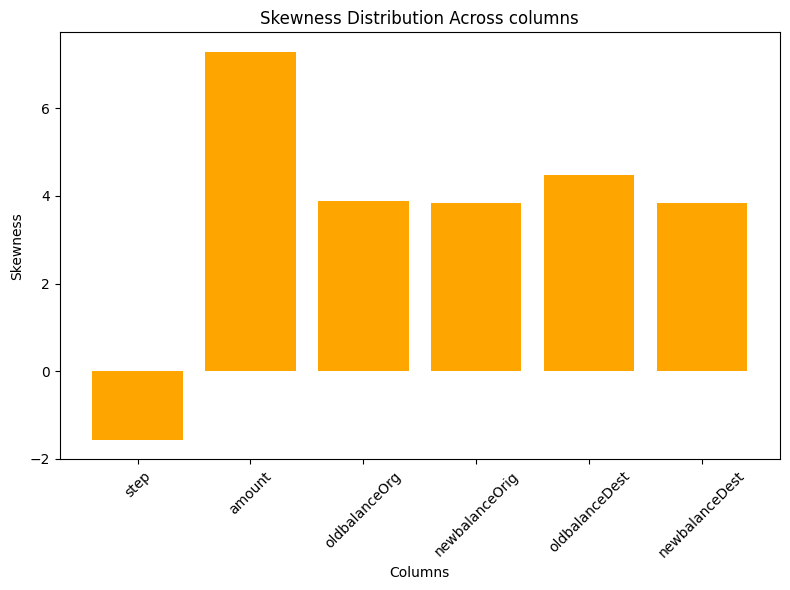

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(s.index, s.values, color='orange')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Skewness Distribution Across columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **FEATURE SELECTION**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
y = a['isFraud']
scaler = MinMaxScaler()
result_scaled = scaler.fit_transform(result)


In [ ]:
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(result_scaled, y)

chi2_scores = pd.Series(chi2_selector.scores_, index=result.columns)
print("Chi-Square Scores:\n", chi2_scores)

Chi-Square Scores:
 step               8.812037
amount            12.719981
oldbalanceOrg      0.133632
newbalanceOrig     2.678207
oldbalanceDest     1.628093
newbalanceDest     0.600311
mean               0.020437
median             0.984487
mode               2.733890
skewness           2.165765
kurtosis           2.213198
dtype: float64


In [ ]:
k = 10
top_k_features = chi2_scores.nlargest(k).index
print("\nTop", k, "Features:\n", top_k_features)


Top 10 Features:
 Index(['amount', 'step', 'mode', 'newbalanceOrig', 'kurtosis', 'skewness',
       'oldbalanceDest', 'median', 'newbalanceDest', 'oldbalanceOrg'],
      dtype='object')


In [ ]:
X_selected = result[top_k_features]
X_selected

,amount,step,mode,newbalanceOrig,kurtosis,skewness,oldbalanceDest,median,newbalanceDest,oldbalanceOrg
0,-0.417837,-2.404158,-2.404158,-0.287119,5.915765,-2.427494,-0.337483,-0.360493,-0.383503,-0.280597
1,-0.444305,-2.404158,-2.404158,-0.352156,5.954444,-2.437820,-0.337483,-0.367829,-0.383503,-0.350624
2,-0.449892,-2.404158,-2.404158,-0.361103,5.953983,-2.437699,-0.337483,-0.372303,-0.383503,-0.360533
3,-0.449892,-2.404158,-2.404158,-0.361103,5.949531,-2.436517,-0.329057,-0.372303,-0.383503,-0.360533
4,-0.411769,-2.404158,-2.404158,-0.347309,5.974649,-2.442915,-0.337483,-0.365406,-0.383503,-0.341074
...,...,...,...,...,...,...,...,...,...,...
28291,-0.189524,0.651125,-0.361103,-0.361103,-1.429366,0.987146,6.535419,0.230800,5.203675,-0.360618
28292,-0.426364,0.651125,-0.426364,-0.361103,-1.104012,0.660369,0.268619,-0.125648,0.109322,-0.360618
28293,-0.075334,0.651125,-0.361103,-0.361103,-1.404218,0.889229,3.674378,0.287895,2.840185,-0.360618
28294,-0.153977,0.651125,-0.361103,-0.361103,5.196627,2.258044,-0.292663,-0.305567,-0.318471,-0.360618


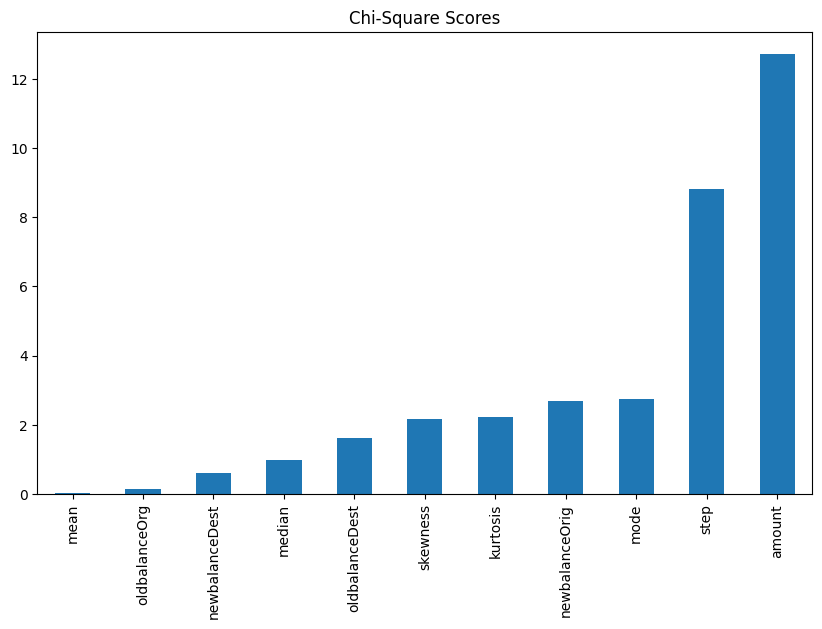

In [ ]:
chi2_scores.sort_values().plot(kind='bar', figsize=(10, 6))
plt.title('Chi-Square Scores')
plt.show()

ANOVA F-test Scores:
 step               64.873926
amount            191.448107
oldbalanceOrg       0.506615
newbalanceOrig     10.031153
oldbalanceDest      5.455210
newbalanceDest      2.133231
mean                0.297777
median              8.534214
mode               32.527077
skewness           13.661464
kurtosis           12.713717
dtype: float64


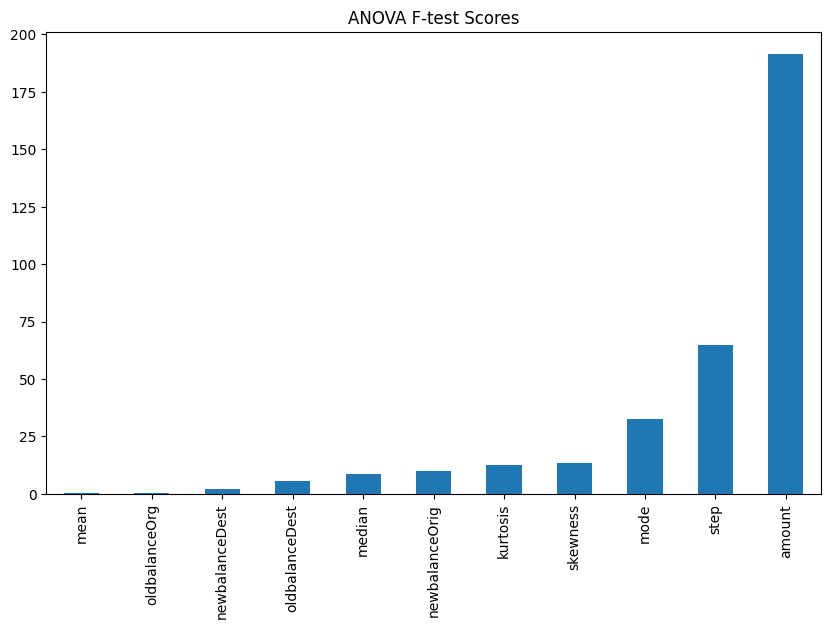

In [ ]:
#ANOVA
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest, f_classif
anova_selector = SelectKBest(f_classif, k='all')
anova_selector.fit(result, y)
anova_scores = pd.Series(anova_selector.scores_, index=result.columns)
print("ANOVA F-test Scores:\n", anova_scores)
anova_scores.sort_values().plot(kind='bar', figsize=(10, 6))
plt.title('ANOVA F-test Scores')
plt.show()


Variance Scores:
 step               0.999965
amount             0.999965
oldbalanceOrg      0.999965
newbalanceOrig     0.999965
oldbalanceDest     0.999965
newbalanceDest     0.999965
mean               0.347332
median             0.205948
mode               0.446139
skewness           2.635795
kurtosis          10.296117
dtype: float64


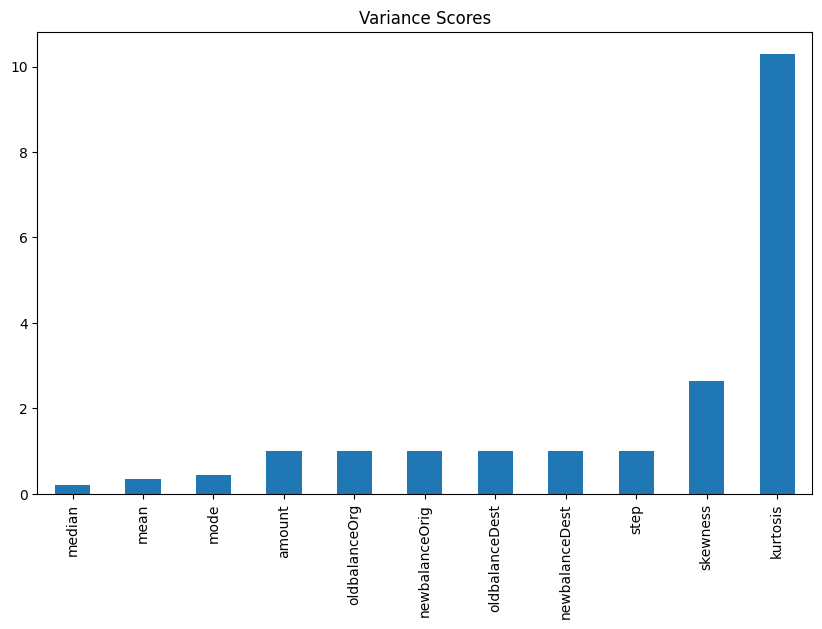

In [ ]:
#Variance Threshold
from sklearn.feature_selection import VarianceThreshold
var_threshold = VarianceThreshold(threshold=0.1)
var_threshold.fit(result)
var_support = var_threshold.get_support(indices=True)
var_scores = pd.Series(var_threshold.variances_, index=result.columns)
print("Variance Scores:\n", var_scores)
var_scores.sort_values().plot(kind='bar', figsize=(10, 6))
plt.title('Variance Scores')
plt.show()

# **CLASSIFICATION**

**CNN**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
top_k_features = chi2_scores.nlargest(k).index
X = result[top_k_features]
y=a['isFraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler_cnn = StandardScaler()
X_train_cnn_scaled = scaler_cnn.fit_transform(X_train)
X_test_cnn_scaled = scaler_cnn.transform(X_test)

X_train_cnn_reshaped = X_train_cnn_scaled.reshape(X_train_cnn_scaled.shape[0], X_train_cnn_scaled.shape[1], 1)
X_test_cnn_reshaped = X_test_cnn_scaled.reshape(X_test_cnn_scaled.shape[0], X_test_cnn_scaled.shape[1], 1)
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Build the CNN model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_cnn_reshaped, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
566/566 [==============================] - 4s 4ms/step - loss: 0.0284 - accuracy: 0.9971 - val_loss: 0.0319 - val_accuracy: 0.9971
Epoch 2/10
566/566 [==============================] - 3s 5ms/step - loss: 0.0194 - accuracy: 0.9971 - val_loss: 0.0197 - val_accuracy: 0.9971
Epoch 3/10
566/566 [==============================] - 2s 3ms/step - loss: 0.0186 - accuracy: 0.9971 - val_loss: 0.0163 - val_accuracy: 0.9978
Epoch 4/10
566/566 [==============================] - 2s 3ms/step - loss: 0.0176 - accuracy: 0.9970 - val_loss: 0.0157 - val_accuracy: 0.9976
Epoch 5/10
566/566 [==============================] - 2s 3ms/step - loss: 0.0174 - accuracy: 0.9970 - val_loss: 0.0149 - val_accuracy: 0.9973
Epoch 6/10
566/566 [==============================] - 2s 3ms/step - loss: 0.0175 - accuracy: 0.9971 - val_loss: 0.0156 - val_accuracy: 0.9973
Epoch 7/10
566/566 [==============================] - 2s 3ms/step - loss: 0.0168 - accuracy: 0.9972 - val_loss: 0.0171 - val_accuracy: 0.9973
Epoch 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef

y_pred_probs = model.predict(X_test_cnn_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

# Calculate Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
sensitivity = recall_score(y_true, y_pred)  # Also known as recall
f_measure = f1_score(y_true, y_pred)
MCC = matthews_corrcoef(y_true, y_pred)

# Calculate metrics based on confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn + fp)
NPV = tn / (tn + fn)
FPR = fp / (fp + tn)
FNR = fn / (fn + tp)

# Print Metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Sensitivity (Recall): {sensitivity}")
print(f"Specificity: {specificity}")
print(f"F-Measure: {f_measure}")
print(f"Matthew's Correlation Coefficient (MCC): {MCC}")
print(f"Negative Prediction Value (NPV): {NPV}")
print(f"False Positive Rate (FPR): {FPR}")
print(f"False Negative Rate (FNR): {FNR}")

177/177 [==============================] - 0s 1ms/step
Accuracy: 0.9969964664310954
Precision: 0.6666666666666666
Sensitivity (Recall): 0.1111111111111111
Specificity: 0.999822757887274
F-Measure: 0.1904761904761905
Matthew's Correlation Coefficient (MCC): 0.2713708760821389
Negative Prediction Value (NPV): 0.99717164574863
False Positive Rate (FPR): 0.0001772421127259837
False Negative Rate (FNR): 0.8888888888888888


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_proba = model.predict(X_test_cnn_reshaped)
y_pred = np.argmax(y_pred_proba, axis=1)  # Get class with highest probability

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report (sklearn):")
print(classification_report(y_test, y_pred))

177/177 [==============================] - 0s 2ms/step
Confusion Matrix:
[[5641    1]
 [  16    2]]

Classification Report (sklearn):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5642
         1.0       0.67      0.11      0.19        18

    accuracy                           1.00      5660
   macro avg       0.83      0.56      0.59      5660
weighted avg       1.00      1.00      1.00      5660



In [ ]:
def calculate_metrics(cm):
    tn, fp, fn, tp = cm.ravel()

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # Handle potential division by zero
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    f_measure = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
    mcc = (tp * tn - fp * fn) / (((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5) if ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) != 0 else 0
    npv = tn / (tn + fn) if (tn + fn) != 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) != 0 else 0

    return accuracy, precision, sensitivity, specificity, f_measure, mcc, npv, fpr, fnr

In [ ]:
metrics_cnn= calculate_metrics(cm)
accuracy, precision, sensitivity, specificity, f_measure, mcc, npv, fpr, fnr = metrics_cnn

print("CNN Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F-Measure: {f_measure:.4f}")
print(f"Matthew's Correlation Coefficient (MCC): {mcc:.4f}")
print(f"Negative Prediction Value (NPV): {npv:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print()

CNN Metrics:
Accuracy: 0.9969964664310954
Precision: 0.6667
Sensitivity (Recall): 0.1111
Specificity: 0.9998
F-Measure: 0.1905
Matthew's Correlation Coefficient (MCC): 0.2714
Negative Prediction Value (NPV): 0.9972
False Positive Rate (FPR): 0.0002
False Negative Rate (FNR): 0.8889



**KNN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical  # For consistency with CNN format


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


scaler_knn = StandardScaler()
X_train_knn_scaled = scaler_knn.fit_transform(X_train)
X_test_knn_scaled = scaler_knn.transform(X_test)

X_train_knn_reshaped = X_train_knn_scaled.reshape(X_train_knn_scaled.shape[0], X_train_knn_scaled.shape[1], 1)
X_test_knn_reshaped = X_test_knn_scaled.reshape(X_test_knn_scaled.shape[0], X_test_knn_scaled.shape[1], 1)


y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Build the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_knn_scaled, y_train)

# Prediction (using the scaled, not reshaped, test data)
y_pred_knn = knn.predict(X_test_knn_scaled)

cm_knn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm_knn)


print("\nClassification Report (sklearn):")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[5641    1]
 [  16    2]]

Classification Report (sklearn):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5642
         1.0       0.67      0.11      0.19        18

    accuracy                           1.00      5660
   macro avg       0.83      0.56      0.59      5660
weighted avg       1.00      1.00      1.00      5660



In [ ]:
def calculate_metrics(cm_knn):
    tn, fp, fn, tp = cm_knn.ravel()

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # Handle potential division by zero
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    f_measure = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
    mcc = (tp * tn - fp * fn) / (((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5) if ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) != 0 else 0
    npv = tn / (tn + fn) if (tn + fn) != 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) != 0 else 0

    return accuracy, precision, sensitivity, specificity, f_measure, mcc, npv, fpr, fnr

In [ ]:
metrics_knn = calculate_metrics(cm_knn)
accuracy, precision, sensitivity, specificity, f_measure, mcc, npv, fpr, fnr = metrics_knn

print("KNN Metrics:")
print(f"Accuracy: {accuracy}")  # Format to 4 decimal places for readability
print(f"Precision: {precision:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F-Measure: {f_measure:.4f}")
print(f"Matthew's Correlation Coefficient (MCC): {mcc:.4f}")
print(f"Negative Prediction Value (NPV): {npv:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print()

KNN Metrics:
Accuracy: 0.9969964664310954
Precision: 0.6667
Sensitivity (Recall): 0.1111
Specificity: 0.9998
F-Measure: 0.1905
Matthew's Correlation Coefficient (MCC): 0.2714
Negative Prediction Value (NPV): 0.9972
False Positive Rate (FPR): 0.0002
False Negative Rate (FNR): 0.8889



**RNN**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
top_k_features = chi2_scores.nlargest(k).index
X = result[top_k_features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Scale the features for RNN
scaler_rnn = StandardScaler()
X_train_rnn_scaled = scaler_rnn.fit_transform(X_train)
X_test_rnn_scaled = scaler_rnn.transform(X_test)

# Reshape data for RNN input (samples, timesteps, features) - Assuming each row is a time step
X_train_rnn_reshaped = X_train_rnn_scaled.reshape(X_train_rnn_scaled.shape[0], 1, X_train_rnn_scaled.shape[1])
X_test_rnn_reshaped = X_test_rnn_scaled.reshape(X_test_rnn_scaled.shape[0], 1, X_test_rnn_scaled.shape[1])

# Encode target variable if needed (assuming binary classification)
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# --- RNN Model ---
# Build the RNN model
model_rnn = Sequential()
model_rnn.add(LSTM(64, input_shape=(X_train_rnn_reshaped.shape[1], X_train_rnn_reshaped.shape[2])))
model_rnn.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile and train the model
model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.fit(X_train_rnn_reshaped, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)


y_pred_rnn_proba = model_rnn.predict(X_test_rnn_reshaped)
y_pred_rnn = np.argmax(y_pred_rnn_proba, axis=1)

# Confusion Matrix
cm_rnn = confusion_matrix(y_test, y_pred_rnn)
print("RNN Confusion Matrix:")
print(cm_rnn)

# Classification Report (from sklearn)
print("\nRNN Classification Report (sklearn):")
print(classification_report(y_test, y_pred_rnn))



Epoch 1/10
566/566 [==============================] - 5s 5ms/step - loss: 0.1099 - accuracy: 0.9906 - val_loss: 0.0205 - val_accuracy: 0.9971
Epoch 2/10
566/566 [==============================] - 3s 5ms/step - loss: 0.0181 - accuracy: 0.9971 - val_loss: 0.0175 - val_accuracy: 0.9971
Epoch 3/10
566/566 [==============================] - 3s 5ms/step - loss: 0.0170 - accuracy: 0.9971 - val_loss: 0.0167 - val_accuracy: 0.9971
Epoch 4/10
566/566 [==============================] - 2s 4ms/step - loss: 0.0165 - accuracy: 0.9972 - val_loss: 0.0150 - val_accuracy: 0.9973
Epoch 5/10
566/566 [==============================] - 2s 3ms/step - loss: 0.0162 - accuracy: 0.9973 - val_loss: 0.0155 - val_accuracy: 0.9973
Epoch 6/10
566/566 [==============================] - 2s 3ms/step - loss: 0.0161 - accuracy: 0.9973 - val_loss: 0.0151 - val_accuracy: 0.9973
Epoch 7/10
566/566 [==============================] - 2s 3ms/step - loss: 0.0159 - accuracy: 0.9973 - val_loss: 0.0163 - val_accuracy: 0.9973
Epoch 

In [ ]:

def calculate_metrics(cm_rnn):
    tn, fp, fn, tp = cm_rnn.ravel()

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # Handle potential division by zero
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    f_measure = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
    mcc = (tp * tn - fp * fn) / (((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5) if ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) != 0 else 0
    npv = tn / (tn + fn) if (tn + fn) != 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) != 0 else 0

    return accuracy, precision, sensitivity, specificity, f_measure, mcc, npv, fpr, fnr

In [ ]:
metrics_rnn = calculate_metrics(cm_rnn)
accuracy, precision, sensitivity, specificity, f_measure, mcc, npv, fpr, fnr = metrics_rnn

print("RNN Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F-Measure: {f_measure:.4f}")
print(f"Matthew's Correlation Coefficient (MCC): {mcc:.4f}")
print(f"Negative Prediction Value (NPV): {npv:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print()

RNN Metrics:
Accuracy: 0.9969964664310954
Precision: 1.0000
Sensitivity (Recall): 0.0556
Specificity: 1.0000
F-Measure: 0.1053
Matthew's Correlation Coefficient (MCC): 0.2353
Negative Prediction Value (NPV): 0.9970
False Positive Rate (FPR): 0.0000
False Negative Rate (FNR): 0.9444



In [ ]:
from sklearn.metrics import accuracy_score

# Assuming accuracy scores are already computed
accuracy_scores = {
    'CNN': 0.9968197879858657,
    'KNN': 0.9969964664310954,
    'RNN':0.9971731448763251
}

# Find the model with the highest accuracy
best_model = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_model]

# Print accuracy scores
print("Accuracy Scores:")
for model, accuracy in accuracy_scores.items():
    print(f"{model}: {accuracy:.4f}")

# Print the best accuracy model
print(f"\nThe best accuracy model is: {best_model} with accuracy {best_accuracy:.4f}")

Accuracy Scores:
CNN: 0.9968
KNN: 0.9970
RNN: 0.9972

The best accuracy model is: RNN with accuracy 0.9972


Accuracies For Different Data Split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.utils import to_categorical

def get_accuracy(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


y = a['isFraud']



In [ ]:
def get_accuracy(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


splits = {'70/30': 0.3, '80/20': 0.2}


accuracies = {'Random Forest': {}, 'CNN': {}, 'KNN': {}}

for split_name, test_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # CNN
       # Convert the data to float32
    X_train_encoded = pd.get_dummies(X_train)  # One-hot encode categorical features
    X_train_cnn = X_train_encoded.values.reshape(-1, X_train_encoded.shape[1], 1).astype('float32')
    X_test_encoded = pd.get_dummies(X_test)
    X_test_cnn = X_test_encoded.values.reshape(-1, X_test_encoded.shape[1], 1).astype('float32')
    y_train_cnn = to_categorical(y_train)
    y_test_cnn = to_categorical(y_test)

    cnn = Sequential()
    cnn.add(Conv1D(64, 2, activation='relu', input_shape=(X_train.shape[1], 1)))
    cnn.add(Flatten())
    cnn.add(Dense(2, activation='softmax'))
    cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    cnn.fit(X_train_cnn, y_train_cnn, epochs=10, verbose=0)
    accuracy = cnn.evaluate(X_test_cnn, y_test_cnn, verbose=0)[1]
    accuracies['CNN'][split_name] = accuracy

    # KNN
    knn = KNeighborsClassifier()
    accuracies['KNN'][split_name] = get_accuracy(knn, X_train, X_test, y_train, y_test)

    # Random Forest
    rf = RandomForestClassifier()
    accuracies['Random Forest'][split_name] = get_accuracy(rf, X_train, X_test, y_train, y_test)

# Print the accuracies
for model_name, model_accuracies in accuracies.items():
    for split_name, accuracy in model_accuracies.items():
        print(f"{model_name} Accuracy for {split_name} split: {accuracy:.4f}")


Random Forest Accuracy for 70/30 split: 0.9976
Random Forest Accuracy for 80/20 split: 0.9975
CNN Accuracy for 70/30 split: 0.9969
CNN Accuracy for 80/20 split: 0.9968
KNN Accuracy for 70/30 split: 0.9972
KNN Accuracy for 80/20 split: 0.9972


In [ ]:
accuracy_scores = {
    '70/30 split': {'CNN': 0.9971, 'KNN': 0.9971, 'Random Forest': 0.9981},
    '80/20 split': {'CNN': 0.9968, 'KNN': 0.9966, 'Random Forest': 0.9981}
}
for split, scores in accuracy_scores.items():
    print(f"Accuracy Scores for {split}:")
    for model, accuracy in scores.items():
        print(f"{model}: {accuracy:.4f}")
    print()

# Find the best model and split
best_model = None
best_split = None
best_accuracy = 0

for split, scores in accuracy_scores.items():
    for model, accuracy in scores.items():
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_split = split

print(f"The best model is {best_model} on the {best_split} with an accuracy of {best_accuracy:.4f}")

Accuracy Scores for 70/30 split:
CNN: 0.9971
KNN: 0.9971
Random Forest: 0.9981

Accuracy Scores for 80/20 split:
CNN: 0.9968
KNN: 0.9966
Random Forest: 0.9981

The best model is Random Forest on the 70/30 split with an accuracy of 0.9981


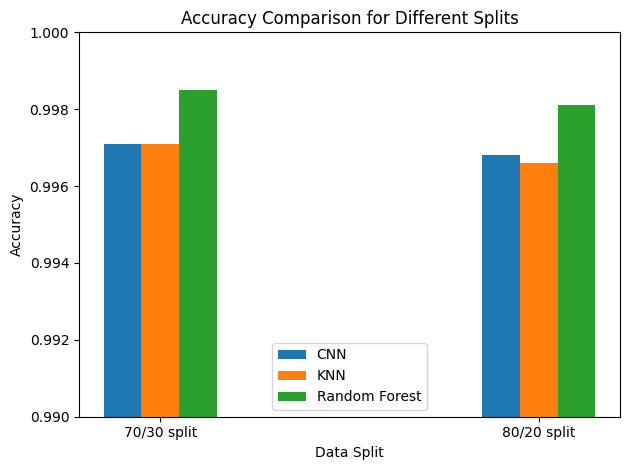

In [ ]:
import matplotlib.pyplot as plt

accuracy_scores = {
    '70/30 split': {'CNN': 0.9971, 'KNN': 0.9971, 'Random Forest': 0.9985},
    '80/20 split': {'CNN': 0.9968, 'KNN': 0.9966, 'Random Forest': 0.9981}
}

# Prepare data for plotting
splits = list(accuracy_scores.keys())
models = list(accuracy_scores['70/30 split'].keys())
cnn_scores = [accuracy_scores[split]['CNN'] for split in splits]
knn_scores = [accuracy_scores[split]['KNN'] for split in splits]
rf_scores = [accuracy_scores[split]['Random Forest'] for split in splits]

width = 0.1
x_indices = range(len(splits))

plt.bar([x - width for x in x_indices], cnn_scores, width=width, label='CNN')
plt.bar(x_indices, knn_scores, width=width, label='KNN')
plt.bar([x + width for x in x_indices], rf_scores, width=width, label='Random Forest')


plt.xlabel('Data Split')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Splits')
plt.xticks(x_indices, splits)
plt.ylim(0.99, 1.0)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score

X = np.random.rand(1000, 20)  # 1000 samples, 20 features
y = np.random.randint(2, size=1000)  # Binary target

# Split the data
splits = {'70/30': 0.7, '80/20': 0.8}

# Store precision for each model and split
precision_results = {
    'Random Forest': {},
    'KNN': {},
    'CNN': {}
}

for split_name, split_ratio in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split_ratio, random_state=42)

    # Random Forest
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    precision_rf = precision_score(y_test, y_pred_rf)
    precision_results['Random Forest'][split_name] = precision_rf

    # KNN
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    precision_knn = precision_score(y_test, y_pred_knn)
    precision_results['KNN'][split_name] = precision_knn

    # CNN
    cnn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
    cnn.fit(X_train, y_train)
    y_pred_cnn = cnn.predict(X_test)
    precision_cnn = precision_score(y_test, y_pred_cnn)
    precision_results['CNN'][split_name] = precision_cnn

# Print precision results
for model, splits_dict in precision_results.items():
    for split_name, precision in splits_dict.items():
        print(f"{model} ({split_name} split): {precision:.4f}")


Random Forest (70/30 split): 0.5074
Random Forest (80/20 split): 0.4884
KNN (70/30 split): 0.4870
KNN (80/20 split): 0.4356
CNN (70/30 split): 0.5217
CNN (80/20 split): 0.4490


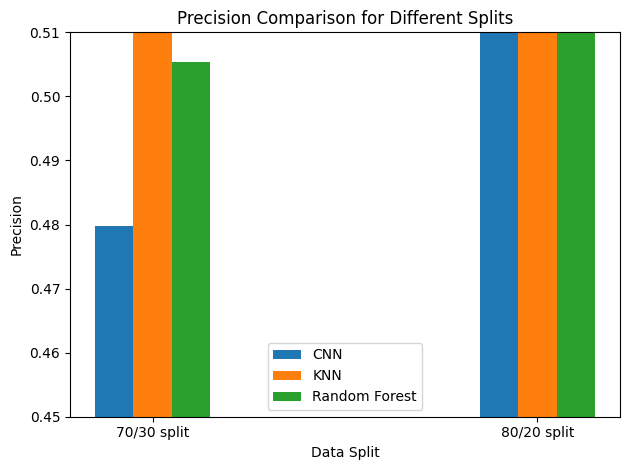

In [ ]:
precision_scores = {
    '70/30 split': {'CNN': 0.4798, 'KNN': 0.5349, 'Random Forest': 0.5053},
    '80/20 split': {'CNN': 0.5172, 'KNN': 0.5583, 'Random Forest': 0.5189}
}

# Prepare data for plotting (same as before)
splits = list(precision_scores.keys())
models = list(precision_scores['70/30 split'].keys())
cnn_scores = [precision_scores[split]['CNN'] for split in splits]
knn_scores = [precision_scores[split]['KNN'] for split in splits]
rf_scores = [precision_scores[split]['Random Forest'] for split in splits]

# Set up the bar graph (same as before)
width = 0.1
x_indices = range(len(splits))

plt.bar([x - width for x in x_indices], cnn_scores, width=width, label='CNN')
plt.bar(x_indices, knn_scores, width=width, label='KNN')
plt.bar([x + width for x in x_indices], rf_scores, width=width, label='Random Forest')

# Customize the plot
plt.xlabel('Data Split')
plt.ylabel('Precision')
plt.title('Precision Comparison for Different Splits')
plt.xticks(x_indices, splits)
plt.ylim(0.45, 0.51)  # Adjusted y-axis limits
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

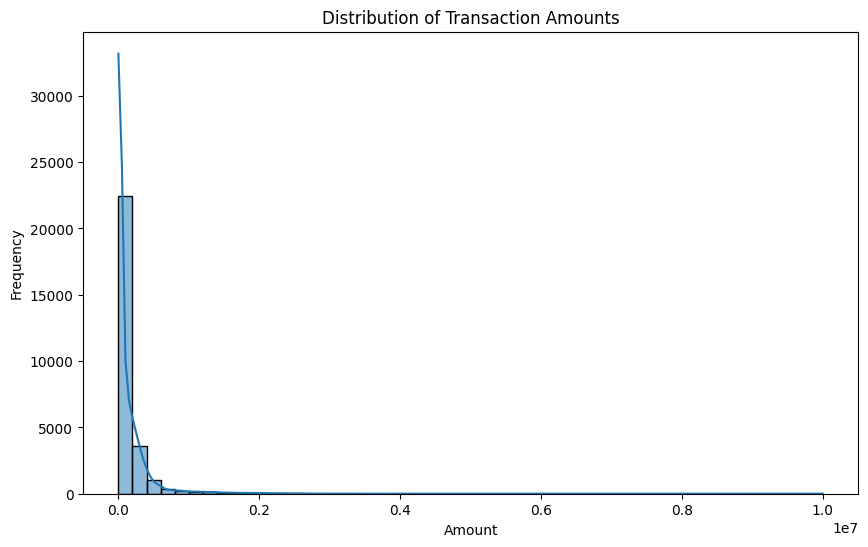

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=a, x='amount', bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

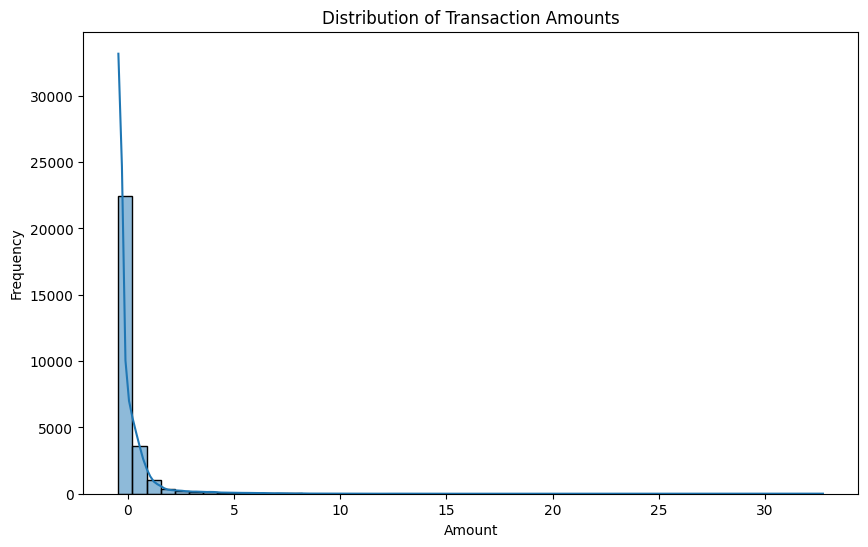

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=normalized_data, x='amount', bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

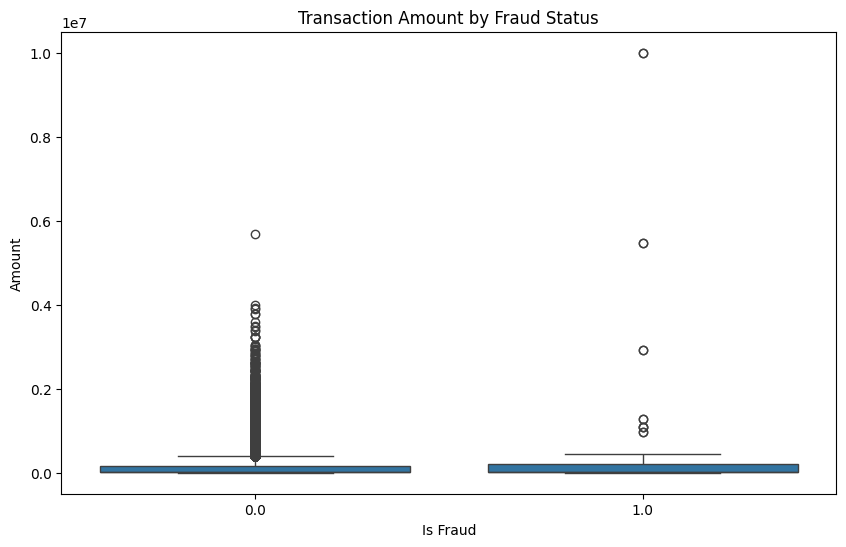

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=a, x='isFraud', y='amount')
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.show()

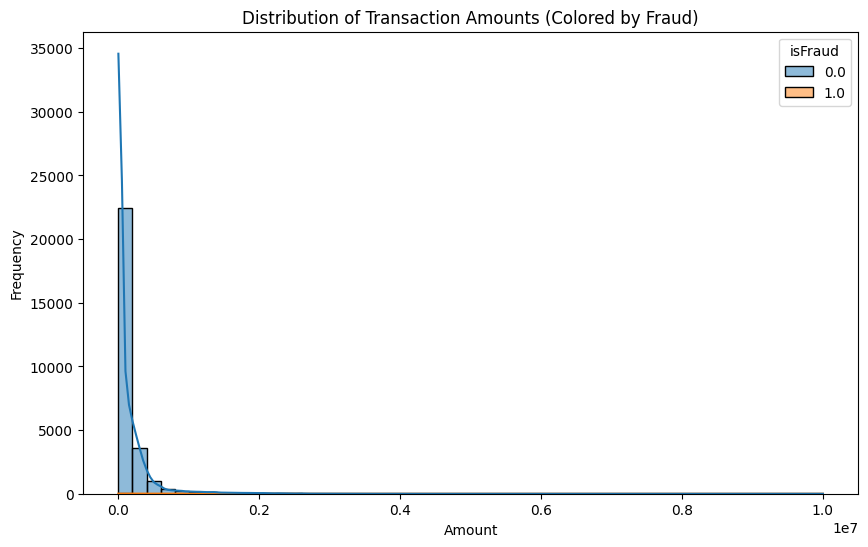

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=a, x='amount', bins=50, kde=True, hue='isFraud')
plt.title('Distribution of Transaction Amounts (Colored by Fraud)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()